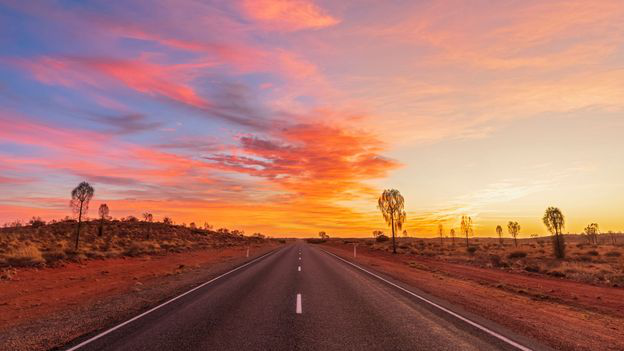

In [1]:
from IPython.display import display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


path="./road.jpg"
img = Image.open(path)

display(img)

arr = np.array(img)

351


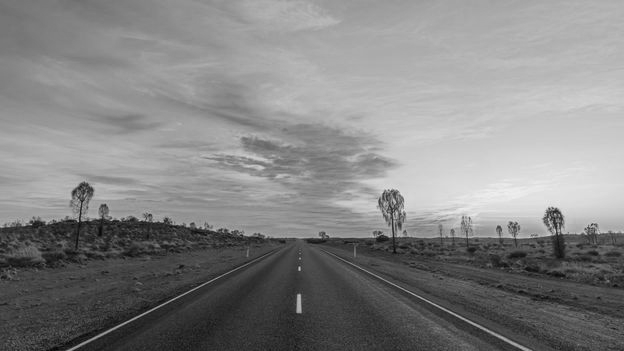

In [2]:
def RGBtoGSsavg(RGB): #best with green
    
    h = len(RGB)
    w = len(RGB[0])
    RGB2 = np.zeros((h, w), dtype=np.uint8)
    print(len(RGB2))
    for i in range(0, h):
        for j in range(0, w):
            RGB2[i][j] = sum(RGB[i][j])/3.
    
    return RGB2

img = Image.fromarray(RGBtoGSsavg(arr), 'L')
display(img)

351


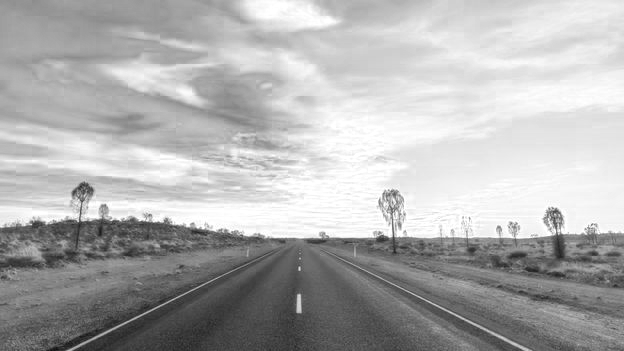

In [3]:
def RGBtoGSmax(RGB):
    
    h = len(RGB)
    w = len(RGB[0])
    RGB2 = np.zeros((h, w), dtype=np.uint8)
    print(len(RGB2))
    for i in range(0, h):
        for j in range(0, w):
            RGB2[i][j] = max(RGB[i][j])
    
    return RGB2

img = Image.fromarray(RGBtoGSmax(arr), 'L')
display(img)

351


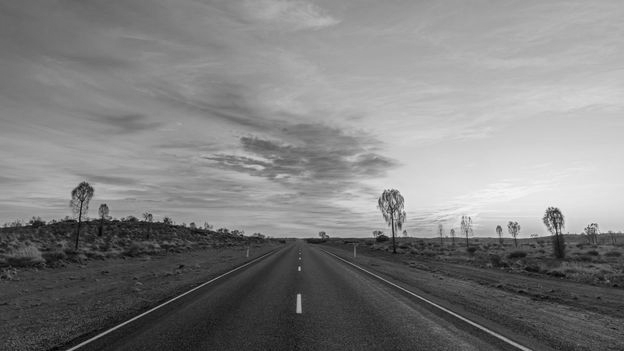

In [4]:
#percieved luminance correction

def RGBtoGSplum(RGB):
    
    h = len(RGB)
    w = len(RGB[0])
    RGB2 = np.zeros((h, w), dtype=np.uint8)
    print(len(RGB2))
    for i in range(0, h):
        for j in range(0, w):
            RGB2[i][j] = 0.2126 * RGB[i][j][0] + 0.7152 * RGB[i][j][1] + 0.0722 * RGB[i][j][2]
    
    return RGB2

img = Image.fromarray(RGBtoGSplum(arr), 'L')
display(img)

351


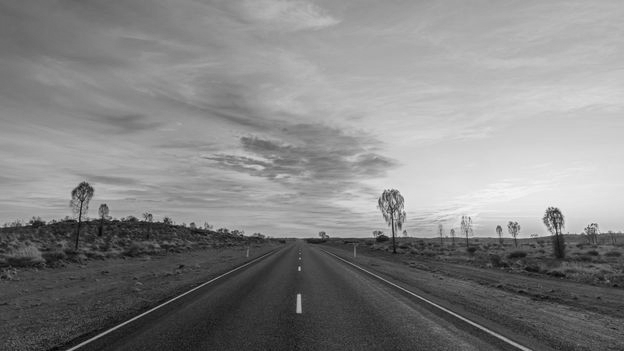

save


In [5]:
#linear approximation of gamma and percieved lumminance correction

def RGBtoGSlgplum(RGB):
    
    h = len(RGB)
    w = len(RGB[0])
    RGB2 = np.zeros((h, w), dtype=np.uint8)
    print(len(RGB2))
    for i in range(0, h):
        for j in range(0, w):
            RGB2[i][j] = 0.299 * RGB[i][j][0] + 0.587 * RGB[i][j][1] + 0.114 * RGB[i][j][2]
    
    return RGB2

img = Image.fromarray(RGBtoGSlgplum(arr), 'L')
display(img)
print("save")
img.save("img1.png")

351


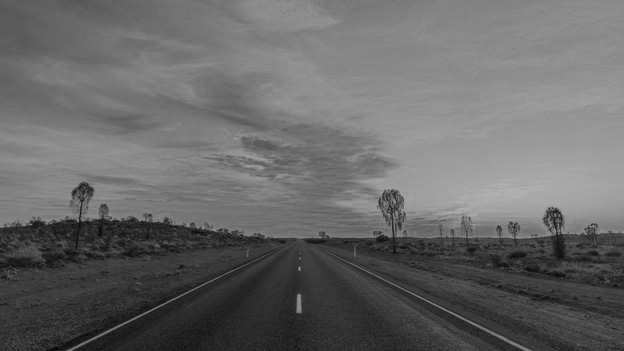

In [6]:
#podejrzana metoda z przejściem przez CIELUV/korekta do artykułu

def RGBtoGSSaravanan(RGB):
    
    h = len(RGB)
    w = len(RGB[0])
    RGB2 = np.zeros((h, w), dtype=np.uint8)
    print(len(RGB2))
    for i in range(0, h):
        for j in range(0, w):
            Y = 0.299 * RGB[i][j][0] + 0.587 * RGB[i][j][1] + 0.114 * RGB[i][j][2]
            U = (RGB[i][j][2] - Y) * 0.565
            V = (RGB[i][j][0] - Y) * 0.713
            UV = U + V
            R1 = RGB[i][j][0] * 0.299
            R2 = RGB[i][j][0] * 0.587            
            R3 = RGB[i][j][0] * 0.114 
            G1 = RGB[i][j][1] * 0.299
            G2 = RGB[i][j][1] * 0.587
            G3 = RGB[i][j][1] * 0.114
            B1 = RGB[i][j][2] * 0.299
            B2 = RGB[i][j][2] * 0.587
            B3 = RGB[i][j][0] * 0.114;
            R4 = (R1 + R2 + R3) 
            G4 = (G1 + G2 + G3) 
            B4 = (B1 + B2 + B3) 
            RGB2 [i][j] = (R4 + G4 + B4 + UV)/4
            
    return RGB2

img = Image.fromarray(RGBtoGSSaravanan(arr), 'L')
display(img)

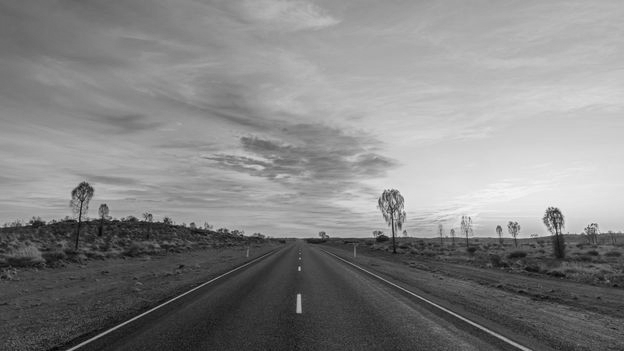

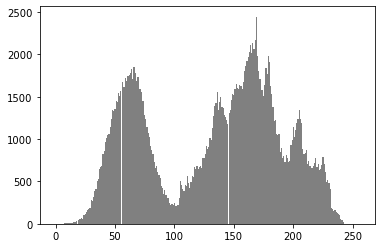

In [7]:
from IPython.display import display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


path="./img1.png"
img = Image.open(path)

display(img)




RGB = np.array(img) # tworzymy tablicę numpy RGB na podstawie rysunku. Uwaga! wartosci sa od 0 do 255 powstaje tablica typu numpy.uint8t

#print(len(RGB))
#print(len(RGB[0]))



RGB2= np.zeros((len(RGB), len(RGB[0]),3), dtype=np.uint8,) # tworzymy nowa tablice typu numpy.uint8t

img2 = Image.fromarray(RGB2, 'RGB') # tworzymy nowy rysunek na podstawie tablicy RGB2 o rozmiarach takich samych jak img


#display(img2) #wyświetlamy obrazek
listaR = np.zeros(256)
listaG = np.zeros(256)
listaB = np.zeros(256)

def histogramRGBz2(data):
    lista = np.zeros((3,256))
    for x in range(len(data)):
            for y in range(len(data[0])):
                value = data[x][y]
                lista[0, value] += 1
                    
    #print(listaR)
    #print(listaG)
    #print(listaB)
    
    R = plt.bar(range(256),lista[0],  color = "grey", width=0.99)
    plt.show(R)
    
    
RGB2 = histogramRGBz2(RGB)
#img_test2 = Image.fromarray(RGB2)
#display(img_test2)
